# Protest for Happiness Analysis 
    * Fereshteh Aghaei
    * Jen Mahon
    * Julia Squeri
    * John Shuford
#### Final Observation and Analysis: 
* -
* -
* -

In [1]:
# Magic Function for graphs/displays
%matplotlib inline

In [2]:
# Importing our Dependencies
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
#from config import api_key
from pprint import pprint


# Hide warning messages in notebook
import warnings
warnings.filterwarnings("ignore")

## Load & Read CSV files

In [3]:
Happiness_Data = pd.read_csv("Happiness_Data/clean_combined_happiness.csv")
Happiness_Data.head()

,Country,Region,Total Happiness Score,Total Freedom Rate,2015 Happiness Rank,2015 Happiness Score,2015 Economy,2015 Family,2015 Health,2015 Freedom,...,2018 Generosity,2018 Dystopia Residual,2019 Happiness Rank,2019 Happiness Score,2019 Economy,2019 Family,2019 Health,2019 Freedom,2019 Generosity,2019 Dystopia Residual
0,Switzerland,Europe,37.557,3.103211,1,7.587,1.39651,1.34951,0.94143,0.66557,...,0.256,0.357,6,7.480,1.452,1.526,1.052,0.572,0.263,0.343
1,Iceland,Europe,37.555,3.090173,2,7.561,1.30232,1.40223,0.94784,0.62877,...,0.353,0.138,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
2,Denmark,Europe,37.730,3.129797,3,7.527,1.32548,1.36058,0.87464,0.64938,...,0.284,0.408,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,Europe,37.705,3.190243,4,7.522,1.45900,1.33095,0.88521,0.66973,...,0.286,0.340,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Canada,North America,36.753,3.054771,5,7.427,1.32629,1.32261,0.90563,0.63297,...,0.321,0.291,9,7.278,1.365,1.505,1.039,0.584,0.285,0.308


In [4]:
Protest_Data = pd.read_csv("Mass_Movement_Data/movement_data.csv")
Protest_Data.head()

,country,year,start,end,protest_duration,region,location,participants_category,protesterdemand1,stateresponse1,total protests
0,Colombia,2016,2016-10-05,2016-10-17,12 days,South America,"Plaza de Bol var & Casa de Nari o, Bogot",>10000,"political behavior, process",ignore,6
1,Colombia,2017,2017-01-22,2017-01-22,0 days,South America,Bogot,100-999,"political behavior, process",crowd dispersal,6
2,Colombia,2017,2017-04-01,2017-04-15,14 days,South America,Bogota,1000-1999,"political behavior, process",ignore,6
3,Colombia,2017,2017-10-05,2017-10-05,0 days,South America,Tumaco,50-99,land farm issue,crowd dispersal,6
4,Colombia,2018,2018-01-26,2018-01-26,0 days,South America,Bogota,2000-4999,social restrictions,crowd dispersal,6


### Count of protests
* How many total protests occurred per region? How does this differ between the regions?
        Bar chart of #
        ANOVA to find differences between 3 group means
        Can show in boxplot
* Heat map to show protests across regions and what countries have the most


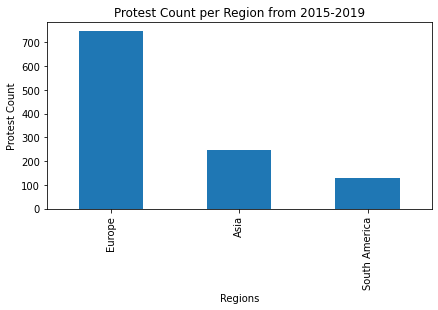

<Figure size 432x288 with 0 Axes>

In [5]:
#Get count of how many protests per region
regions = Protest_Data['region'].value_counts()

regions.plot(kind='bar')
plt.tight_layout()
plt.xlabel("Regions")
plt.ylabel("Protest Count")
plt.title("Protest Count per Region from 2015-2019")
plt.show()

# Save an image of our chart 
plt.savefig("Images/region_protest.png")

In [6]:
europe = Protest_Data.loc[Protest_Data['region']== 'Europe']
europe_count = europe['country'].value_counts()
europe_count

Germany            117
France             110
United Kingdom      80
Romania             52
Spain               47
Greece              34
Ireland             34
Russia              32
Italy               26
Armenia             22
Poland              22
Moldova             21
Slovak Republic     14
Hungary             14
Albania             13
Macedonia           12
Bosnia              11
Belgium             10
Belarus              9
Czech Republic       8
Serbia               7
Croatia              7
Georgia              7
Latvia               6
Kosovo               6
Sweden               6
Bulgaria             5
Cyprus               5
Finland              5
Portugal             5
Name: country, dtype: int64

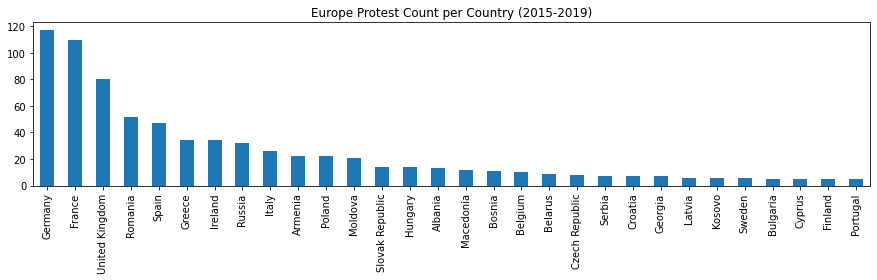

In [7]:
europe_count.plot(kind='bar', figsize=(15,3))
plt.title("Europe Protest Count per Country (2015-2019)")

# Save an image of our chart 
plt.savefig("Images/europ_protest_plot.png")

In [8]:
asia = Protest_Data.loc[Protest_Data['region']== 'Asia']
asia_count = asia['country'].value_counts()
asia_count

China          41
India          33
Malaysia       27
Pakistan       21
Bangladesh     19
Thailand       17
Indonesia      16
Afghanistan    15
Myanmar        12
Taiwan         12
South Korea    11
Philippines    11
Cambodia        6
Nepal           6
Name: country, dtype: int64

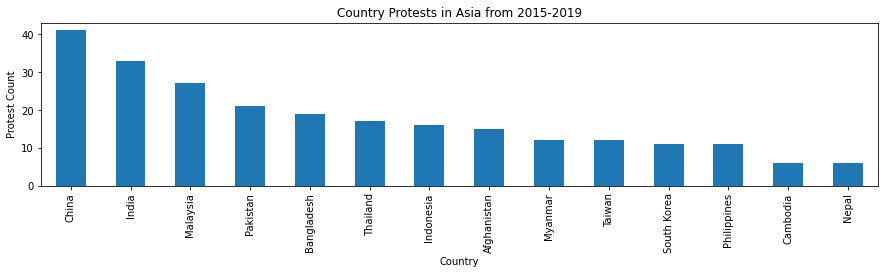

<Figure size 432x288 with 0 Axes>

In [9]:
asia_count.plot(kind='bar', figsize=(15,3))
plt.xlabel("Country")
plt.ylabel("Protest Count")
plt.title("Country Protests in Asia from 2015-2019")
plt.show()
# Save an image of our chart
plt.savefig("Images/asia_protest_plot.png")

In [10]:
southamerica = Protest_Data.loc[Protest_Data['region']== 'South America']
southamerica_count = southamerica['country'].value_counts()
southamerica_count

Brazil       37
Venezuela    34
Chile        16
Argentina    14
Peru         11
Bolivia       9
Colombia      6
Name: country, dtype: int64

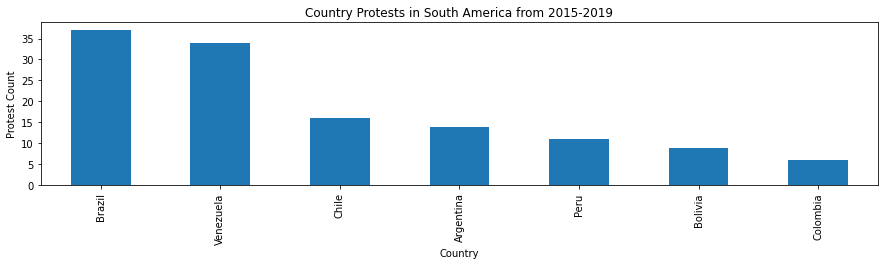

<Figure size 432x288 with 0 Axes>

In [11]:
southamerica_count.plot(kind='bar', figsize=(15,3))
plt.xlabel("Country")
plt.ylabel("Protest Count")
plt.title("Country Protests in South America from 2015-2019")
plt.show()
# Save an image of our chart
plt.savefig("Images/southamerica_protest_plot.png")

### Size of protest
* How many people attended the protests per region/what was the average protest size?
        * Bar chart of #
        * ANOVA to find differences between 3 group means
                * Can show in boxplot


In [12]:
#Creates bins for protest size
bins = [0,1,2,3,4,5]

group_names = ["50-99", "100-999", "1000-1999","2000-4999","5000-10000", ">10000"]

In [13]:
south_america_count = Protest_Data.loc[Protest_Data['region'] == 'South America', 'participants_category'].value_counts()
europe_count = Protest_Data.loc[Protest_Data['region'] == 'Europe', 'participants_category'].value_counts()
asia_count = Protest_Data.loc[Protest_Data['region'] == 'Asia', 'participants_category'].value_counts()

In [14]:
protest_size_df = pd.DataFrame({"South America": south_america_count,
                               "Europe": europe_count,
                               "Asia": asia_count})
protest_size_df

,South America,Europe,Asia
100-999,32,153,91
1000-1999,4,28,10
2000-4999,24,157,48
50-99,23,193,51
5000-10000,12,71,16
>10000,32,145,31


In [15]:
protest_size_df = protest_size_df.reset_index()
#protest_size_df

# Reset index smallest to largest
protest_size_df2 = protest_size_df.reindex([3,0,1,2,4,5])
protest_df3 = protest_size_df2.set_index('index')
protest_df3

,South America,Europe,Asia
index,,,
50-99,23,193,51
100-999,32,153,91
1000-1999,4,28,10
2000-4999,24,157,48
5000-10000,12,71,16
>10000,32,145,31


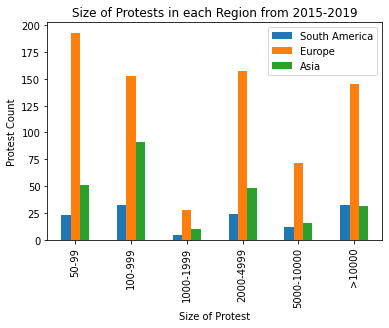

<Figure size 432x288 with 0 Axes>

In [16]:
multi_plot = protest_df3.plot(kind="bar")
plt.xlabel("Size of Protest")
plt.ylabel("Protest Count")
plt.title("Size of Protests in each Region from 2015-2019")
plt.show()


# Save an image of our chart 
plt.savefig("Images/regions_multi_plot.png")

### Protest type
* What was the reason for the protest? (I.e, political behavior, police brutality, political process, etc) How does this differ between the regions?
        * Bar chart of #
        * ANOVA to find differences between 3 group means
                * Can show in boxplot
                * Can expand on these analyses to look at the protest breakdown per region (i.e, protests in europe)


In [17]:
Protest_Data.head()

,country,year,start,end,protest_duration,region,location,participants_category,protesterdemand1,stateresponse1,total protests
0,Colombia,2016,2016-10-05,2016-10-17,12 days,South America,"Plaza de Bol var & Casa de Nari o, Bogot",>10000,"political behavior, process",ignore,6
1,Colombia,2017,2017-01-22,2017-01-22,0 days,South America,Bogot,100-999,"political behavior, process",crowd dispersal,6
2,Colombia,2017,2017-04-01,2017-04-15,14 days,South America,Bogota,1000-1999,"political behavior, process",ignore,6
3,Colombia,2017,2017-10-05,2017-10-05,0 days,South America,Tumaco,50-99,land farm issue,crowd dispersal,6
4,Colombia,2018,2018-01-26,2018-01-26,0 days,South America,Bogota,2000-4999,social restrictions,crowd dispersal,6


In [18]:
south_america_reason = Protest_Data.loc[Protest_Data['region'] == 'South America', 'protesterdemand1'].value_counts()
europe_reason = Protest_Data.loc[Protest_Data['region'] == 'Europe', 'protesterdemand1'].value_counts()
asia_reason = Protest_Data.loc[Protest_Data['region'] == 'Asia', 'protesterdemand1'].value_counts()

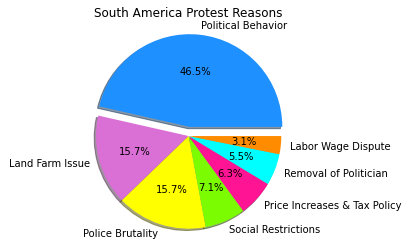

In [19]:
protest_reasons = ["Political Behavior", 
                   "Land Farm Issue", 
                   "Police Brutality", 
                   "Social Restrictions", 
                   "Price Increases & Tax Policy", 
                   "Removal of Politician", 
                   "Labor Wage Dispute"]

colors = ["dodgerblue","orchid","yellow","lawngreen","deeppink","cyan","darkorange"]

explode = (0.1,0,0,0,0,0,0)

south_america_reason.plot(kind='pie', 
               labels= protest_reasons, 
               colors=colors, 
               autopct="%1.1f%%", 
               ylabel= " ", 
               explode=explode, 
               shadow=True)


plt.title("South America Protest Reasons")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/south_america_pie.png")
plt.show()


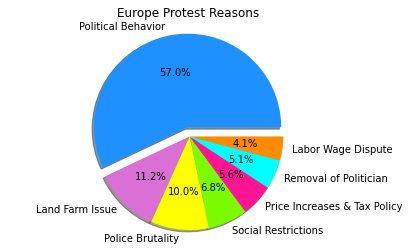

In [20]:
protest_reasons = ["Political Behavior", 
                   "Land Farm Issue", 
                   "Police Brutality", 
                   "Social Restrictions", 
                   "Price Increases & Tax Policy", 
                   "Removal of Politician", 
                   "Labor Wage Dispute"]

colors = ["dodgerblue","orchid","yellow","lawngreen","deeppink","cyan","darkorange"]

explode = (0.1,0,0,0,0,0,0)

europe_reason.plot(kind='pie', 
               labels= protest_reasons, 
               colors=colors, 
               autopct="%1.1f%%", 
               ylabel= " ", 
               explode=explode, 
               shadow=True)


plt.title("Europe Protest Reasons")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/europe_pie.png")

plt.show()


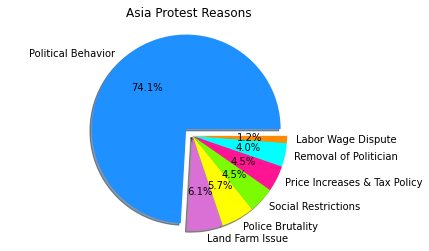

In [21]:
protest_reasons = ["Political Behavior", 
                   "Land Farm Issue", 
                   "Police Brutality", 
                   "Social Restrictions", 
                   "Price Increases & Tax Policy", 
                   "Removal of Politician", 
                   "Labor Wage Dispute"]

colors = ["dodgerblue","orchid","yellow","lawngreen","deeppink","cyan","darkorange"]

explode = (0.1,0,0,0,0,0,0)

asia_reason.plot(kind='pie', 
               labels= protest_reasons, 
               colors=colors, 
               autopct="%1.1f%%", 
               ylabel= " ", 
               explode=explode, 
               shadow=True)

plt.title("Asia Protest Reasons")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/asia_pie.png")

plt.show()


### Happiness score
* From World Happiness Report
        * Bar chart or box plot to show difference of happiness score between regions being compared
* Do the number/frequency of protests in a country affect how happy the country is?
        * Line chart happiness rating/protest numbers over the years
        * Scatter plot


In [22]:
Happiness_Data = Happiness_Data.rename(columns={"Country":"country"})
Happiness_Data = Happiness_Data.rename(columns={"Region":"region"})
Happiness_Data.head()

,country,region,Total Happiness Score,Total Freedom Rate,2015 Happiness Rank,2015 Happiness Score,2015 Economy,2015 Family,2015 Health,2015 Freedom,...,2018 Generosity,2018 Dystopia Residual,2019 Happiness Rank,2019 Happiness Score,2019 Economy,2019 Family,2019 Health,2019 Freedom,2019 Generosity,2019 Dystopia Residual
0,Switzerland,Europe,37.557,3.103211,1,7.587,1.39651,1.34951,0.94143,0.66557,...,0.256,0.357,6,7.480,1.452,1.526,1.052,0.572,0.263,0.343
1,Iceland,Europe,37.555,3.090173,2,7.561,1.30232,1.40223,0.94784,0.62877,...,0.353,0.138,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
2,Denmark,Europe,37.730,3.129797,3,7.527,1.32548,1.36058,0.87464,0.64938,...,0.284,0.408,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,Europe,37.705,3.190243,4,7.522,1.45900,1.33095,0.88521,0.66973,...,0.286,0.340,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Canada,North America,36.753,3.054771,5,7.427,1.32629,1.32261,0.90563,0.63297,...,0.321,0.291,9,7.278,1.365,1.505,1.039,0.584,0.285,0.308


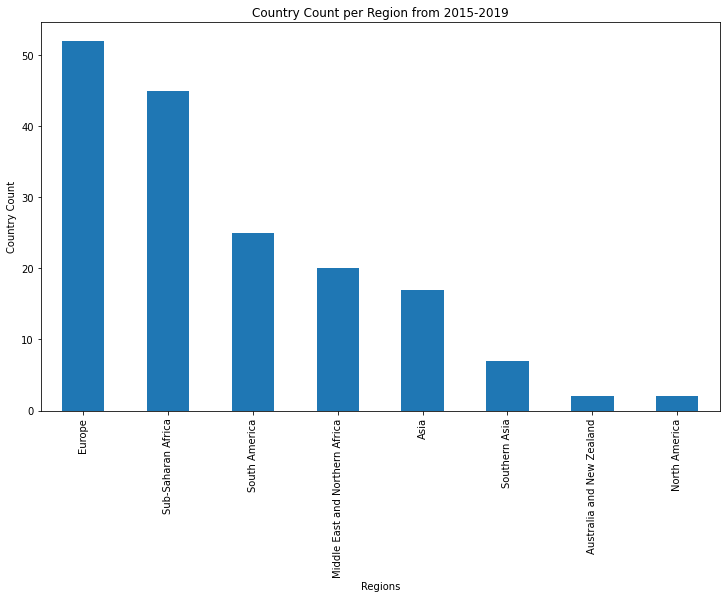

<Figure size 432x288 with 0 Axes>

In [23]:
Happiness_Data.dropna(axis=0, how='any', inplace=True)

regions = Happiness_Data['region'].value_counts()

regions.plot(kind='bar',figsize=(10,8))
plt.tight_layout()
plt.xlabel("Regions")
plt.ylabel("Country Count")
plt.title("Country Count per Region from 2015-2019")
plt.show()

# Save an image of our chart 
plt.savefig("Images/regions_happiness_plot.png")

### For Loops

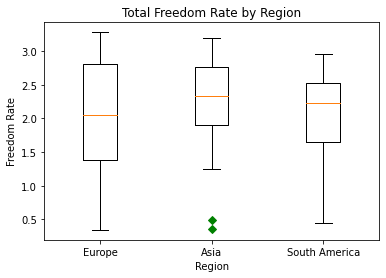

F_onewayResult(statistic=0.1535601787489368, pvalue=0.8578709219547069)

<Figure size 432x288 with 0 Axes>

In [24]:
region = ['Europe', 'Asia', 'South America']

region_freedom = []

for country in region:
    freedom = (Happiness_Data.loc[Happiness_Data['region'] == country, 'Total Freedom Rate'])
    region_freedom.append(freedom)

fig1, ax1 = plt.subplots()
ax1.set_title ("Total Freedom Rate by Region")
ax1.set_xlabel("Region")
ax1.set_ylabel("Freedom Rate")
ax1.boxplot(region_freedom, notch = 0, sym = 'gD')
plt.xticks([1,2,3], region)
plt.show()

plt.savefig("Images/region_freedom_boxplot.png")


group1= region_freedom[0]
group2= region_freedom[1]
group3= region_freedom[2]

stats.f_oneway(group1, group2, group3)


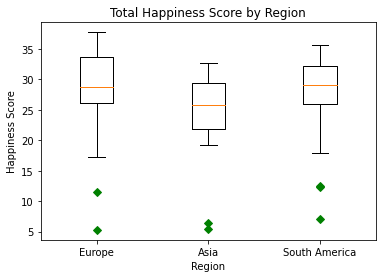

F_onewayResult(statistic=3.3169328702417262, pvalue=0.040696894762542665)

<Figure size 432x288 with 0 Axes>

In [25]:
region = ['Europe', 'Asia', 'South America']

region_happiness = []

for country in region:
    happiness = (Happiness_Data.loc[Happiness_Data['region'] == country, 'Total Happiness Score'])
    region_happiness.append(happiness)

fig1, ax1 = plt.subplots()
ax1.set_title ("Total Happiness Score by Region")
ax1.set_xlabel("Region")
ax1.set_ylabel("Happiness Score")
ax1.boxplot(region_happiness, notch = 0, sym = 'gD')
plt.xticks([1,2,3], region)
plt.show()

plt.savefig("Images/region_happiness_boxplot.png")


group1= region_happiness[0]
group2= region_happiness[1]
group3= region_happiness[2]

stats.f_oneway(group1, group2, group3)

### Reshape Happiness Dataframe

In [26]:
melt_happiness = pd.melt(Happiness_Data,
                 id_vars=['country',
                          'region',
                          'Total Happiness Score',
                          'Total Freedom Rate'],
                  value_vars=['2015 Happiness Rank',
                              '2015 Happiness Score',
                              '2015 Freedom',
                              '2015 Corruption/Trust',
                              
                              '2016 Happiness Rank',
                              '2016 Happiness Score',
                              '2016 Freedom',
                              '2016 Corruption/Trust',
                          
                              '2017 Happiness Rank',
                              '2017 Happiness Score',
                              '2017 Freedom',
                              '2017 Corruption/Trust',
                          
                              '2018 Happiness Rank',
                              '2018 Happiness Score',
                              '2018 Freedom',
                          
                              '2019 Happiness Rank',
                              '2019 Happiness Score',
                              '2019 Freedom'],
                  var_name='years')

melt_happiness = melt_happiness.rename(columns={"value":"Happiness Rank"})

melt_happiness = melt_happiness.rename(columns={"Total Happiness Score":"Sum Happiness Score (2015-2019)"})

melt_happiness = melt_happiness.rename(columns={"Total Freedom Rate":"Sum Freedom Score (2015-2019)"})
col_name="years"
first_col = melt_happiness.pop(col_name)
melt_happiness.insert(2, col_name, first_col)

col_name="Happiness Rank"
sec_col = melt_happiness.pop(col_name)
melt_happiness.insert(3, col_name, sec_col)

melt_happiness.head()

,country,region,years,Happiness Rank,Sum Happiness Score (2015-2019),Sum Freedom Score (2015-2019)
0,Switzerland,Europe,2015 Happiness Rank,1.0,37.557,3.103211
1,Iceland,Europe,2015 Happiness Rank,2.0,37.555,3.090173
2,Denmark,Europe,2015 Happiness Rank,3.0,37.730,3.129797
3,Norway,Europe,2015 Happiness Rank,4.0,37.705,3.190243
4,Canada,North America,2015 Happiness Rank,5.0,36.753,3.054771


In [27]:
happiness_stats = melt_happiness.describe()
happiness_stats

,Happiness Rank,Sum Happiness Score (2015-2019),Sum Freedom Score (2015-2019)
count,3060.000000,3060.000000,3060.000000
mean,21.612162,24.743482,1.891018
std,40.558853,7.724946,0.799833
min,0.000000,4.369000,0.109730
25%,0.249428,20.241000,1.277942
50%,3.352000,25.791000,2.038566
75%,7.494250,30.112000,2.492338
max,158.000000,37.730000,3.279939


In [28]:
print ('Sum Happiness Score (2015-2019)(max):',melt_happiness['Sum Happiness Score (2015-2019)'].max())
print ('Sum Happiness Score (2015-2019)(min):',melt_happiness['Sum Happiness Score (2015-2019)'].min())
print ('Sum Happiness Score (2015-2019)(mean):',melt_happiness['Sum Happiness Score (2015-2019)'].mean())

Sum Happiness Score (2015-2019)(max): 37.72999984
Sum Happiness Score (2015-2019)(min): 4.369
Sum Happiness Score (2015-2019)(mean): 24.743482354017647


In [29]:
top10 = melt_happiness.head(10)
top10

,country,region,years,Happiness Rank,Sum Happiness Score (2015-2019),Sum Freedom Score (2015-2019)
0,Switzerland,Europe,2015 Happiness Rank,1.0,37.557,3.103211
1,Iceland,Europe,2015 Happiness Rank,2.0,37.555,3.090173
2,Denmark,Europe,2015 Happiness Rank,3.0,37.730,3.129797
3,Norway,Europe,2015 Happiness Rank,4.0,37.705,3.190243
4,Canada,North America,2015 Happiness Rank,5.0,36.753,3.054771
5,Finland,Europe,2015 Happiness Rank,6.0,37.689,3.107681
6,Netherlands,Europe,2015 Happiness Rank,7.0,37.023,2.948254
7,Sweden,Europe,2015 Happiness Rank,8.0,36.596,3.087904
8,New Zealand,Australia and New Zealand,2015 Happiness Rank,9.0,36.565,3.088912
9,Australia,Australia and New Zealand,2015 Happiness Rank,10.0,36.381,3.025217


In [30]:
bottom10 = melt_happiness.tail(10)
bottom10

,country,region,years,Happiness Rank,Sum Happiness Score (2015-2019),Sum Freedom Score (2015-2019)
3050,Somalia,Sub-Saharan Africa,2019 Freedom,0.559,20.241,2.402907
3051,Somaliland Region,Sub-Saharan Africa,2019 Freedom,0.000,5.057,0.391300
3052,Namibia,Sub-Saharan Africa,2019 Freedom,0.401,18.228,1.926444
3053,South Sudan,Sub-Saharan Africa,2019 Freedom,0.010,13.530,0.465682
3054,Taiwan Province of China,Asia,2019 Freedom,0.000,6.422,0.361467
3055,"Hong Kong S.A.R., China",Asia,2019 Freedom,0.000,5.472,0.490969
3056,Trinidad & Tobago,South America,2019 Freedom,0.489,12.384,1.064000
3057,Northern Cyprus,Europe,2019 Freedom,0.417,11.553,0.912000
3058,North Macedonia,Europe,2019 Freedom,0.345,5.274,0.345000
3059,Gambia,Sub-Saharan Africa,2019 Freedom,0.382,4.516,0.382000


In [31]:
melt_happiness['region'].value_counts()

Europe                             936
Sub-Saharan Africa                 810
South America                      450
Middle East and Northern Africa    360
Asia                               306
Southern Asia                      126
Australia and New Zealand           36
North America                       36
Name: region, dtype: int64

In [32]:
melt_happiness.groupby('region').mean()['Sum Happiness Score (2015-2019)'].sort_values(ascending=False)

region
Australia and New Zealand          36.473000
North America                      35.873500
Europe                             28.746038
South America                      26.745720
Middle East and Northern Africa    25.618600
Asia                               23.782176
Southern Asia                      22.903286
Sub-Saharan Africa                 18.250444
Name: Sum Happiness Score (2015-2019), dtype: float64

In [33]:
germany_happiness = melt_happiness.loc[melt_happiness['country']=='Germany']

germany_protest = Protest_Data.loc[Protest_Data['country']=='Germany']

germany_happiness= germany_happiness.rename(columns={"Happiness Rank":"Metrics"})

germany_happiness.head()

,country,region,years,Metrics,Sum Happiness Score (2015-2019),Sum Freedom Score (2015-2019)
25,Germany,Europe,2015 Happiness Rank,26.00000,34.645,2.792941
195,Germany,Europe,2015 Happiness Score,6.75000,34.645,2.792941
365,Germany,Europe,2015 Freedom,0.61477,34.645,2.792941
535,Germany,Europe,2015 Corruption/Trust,0.21843,34.645,2.792941
705,Germany,Europe,2016 Happiness Rank,16.00000,34.645,2.792941


## Groupby Protest Dataframe

In [34]:
grouped_protest = Protest_Data.groupby('country')['total protests'].count()
grouped_protest

country
Afghanistan         15
Albania             13
Argentina           14
Armenia             22
Bangladesh          19
Belarus              9
Belgium             10
Bolivia              9
Bosnia              11
Brazil              37
Bulgaria             5
Cambodia             6
Chile               16
China               41
Colombia             6
Croatia              7
Cyprus               5
Czech Republic       8
Finland              5
France             110
Georgia              7
Germany            117
Greece              34
Hungary             14
India               33
Indonesia           16
Ireland             34
Italy               26
Kosovo               6
Latvia               6
Macedonia           12
Malaysia            27
Moldova             21
Myanmar             12
Nepal                6
Pakistan            21
Peru                11
Philippines         11
Poland              22
Portugal             5
Romania             52
Russia              32
Serbia               7
Slo

### Merged DataFrames

In [35]:
grouped_happiness = melt_happiness.groupby('country')['Sum Happiness Score (2015-2019)','Sum Freedom Score (2015-2019)' ].mean()
grouped_happiness


,Sum Happiness Score (2015-2019),Sum Freedom Score (2015-2019)
country,,
Afghanistan,17.564,0.589620
Albania,23.563,1.859489
Algeria,28.338,0.892186
Angola,15.489,0.109730
Argentina,32.297,2.408099
...,...,...
Venezuela,27.657,1.068547
Vietnam,25.773,2.886036
Yemen,18.129,1.220874


In [36]:
#Countries and happiness score
happiness_protest_df = pd.merge(grouped_protest, grouped_happiness, on=['country'], how='left')

happiness_protest_df = happiness_protest_df.fillna(0)

happiness_protest_df.head()

,total protests,Sum Happiness Score (2015-2019),Sum Freedom Score (2015-2019)
country,,,
Afghanistan,15,17.564,0.589620
Albania,13,23.563,1.859489
Argentina,14,32.297,2.408099
Armenia,22,21.966,1.080143
Bangladesh,19,22.901,2.391337


In [43]:
happiness_protest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Afghanistan to Venezuela
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   total protests                   51 non-null     int64  
 1   Sum Happiness Score (2015-2019)  51 non-null     float64
 2   Sum Freedom Score (2015-2019)    51 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 4.1+ KB


In [45]:
# # but to me it seems like they want you to plot happiness vs number of protests over the years
# # so maybe for each year you take the happiness rating vs number of protests, either by country or averaged over all countries

# # Create a dataframe for 
# europe_data = happiness_protest_df.loc[happiness_protest_df['region'] == 'Europe']


# # Create a title, x label, and y label for our chart
# plt.title("Europe Happiness Vs Protests")
# x_values = europe_data['total protests']
# y_values = europe_data['Sum Happiness Score (2015-2019)']
# plt.scatter(x_values,y_values, alpha = 1, marker = 'o', facecolors = 'blue', edgecolors ='none')
# plt.xlabel("Number of Protests")
# plt.ylabel('Happiness Score')

# # Save the figure
# #plt.savefig("Images/Scatterplot.png")

# #getting the regression#
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# #plotting the regression line
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# # Display Graph
# plt.show()

In [46]:
# germany_df = happiness_protest_df.loc[happiness_protest_df['country']=='Germany']

# ger_happiness = happiness_protest_df.loc[happiness_protest_df,["2015 Happiness Score", "2016 Happiness Score", 
#                                                   "2017 Happiness Score", "2018 Happiness Score", "2019 Happiness Score"]]

# plt.scatter(germany_df, ger_happiness)
# #plt.show()
# #y_axis = germany_df.loc[germany_df['Total Happiness Score']]

# #plt.scatter(germany_df, y_axis)

### Freedom score/index 
* From World Happiness Report
* Does a country's freedom score correlate with the amount of protests occurring?
        * Scatter
        * Could do per region, or for one specific region/country 
            * For ex, if we see one country has a low freedom score and a low number of protests, could be more 
              meaningful to just show that countries data (does that mean the protests are suppressed? Does that mean 
              people feel like they cant protest?) 


### Freedom

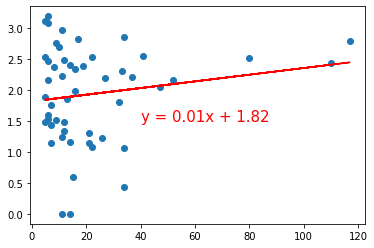

(0.16404285206493666, 0.25003264748936765)
The r-squared is: 0.026910057313598683


In [53]:
x_values = happiness_protest_df['total protests']
y_values = happiness_protest_df['Sum Freedom Score (2015-2019)']
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")


plt.show()

print(stats.pearsonr(x_values, y_values))
print(f"The r-squared is: {rvalue**2}")

In [48]:
# # Create a dataframe for Germany
# europe_data = happiness_protest_df.loc[happiness_protest_df['region'] == 'Europe']


# # Create a title, x label, and y label for our chart
# plt.title("Europe Freedom Score Vs Protests")
# x_values = europe_data['total protests']
# y_values = europe_data['Sum Freedom Score (2015-2019)']
# plt.scatter(x_values,y_values, alpha = 1, marker = 'o', facecolors = 'blue', edgecolors ='none')
# plt.xlabel("Number of Protests")
# plt.ylabel('Freedom Score')

# # Save the figure
# #plt.savefig("Images/Scatterplot.png")

# # Display Graph
# plt.show()

### Perceptions of corruption/government trust
* From World Happiness Report
* Does a country's perception of corruption/trust of government  correlate with the amount of protests occurring? Does it correlate with the type of protests occurring? (i.e, does a country with low trust in its government have a greater number of anti-government protests?)
        * Scatter
        * Could do per region, or for one specific region/country 
            * For ex, if we see one country has a low trust number and a high number of protests, could be more meaningful 
               to just show that countries data (Do we see a relationship where low trust in government leads to a greater 
               number of anti-gov’t/anti-corruption protests?)


### Happiness

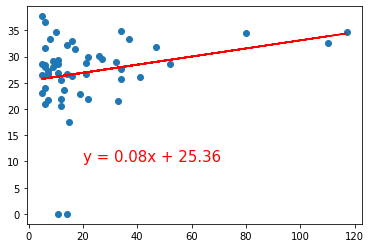

(0.258556158674807, 0.06695538183305326)
The r-squared is: 0.06685128718867196


In [52]:
x_values = happiness_protest_df['total protests']
y_values = happiness_protest_df['Sum Happiness Score (2015-2019)']
plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")


plt.show()

print(stats.pearsonr(x_values, y_values))
print(f"The r-squared is: {rvalue**2}")